<a href="https://colab.research.google.com/github/shakeraema/Dataset_Manipulation/blob/main/Project1-PDS10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/car-price-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 141k/141k [00:00<00:00, 33.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/versions/1


In [4]:
dataset_url = "https://raw.githubusercontent.com/sukhmandeepsinghbrar/car-price-prediction-dataset/master/car%20price%20prediction.csv"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = '/content/drive/MyDrive/PDS-Data/cardekho.csv'

df = pd.read_csv(data)

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [9]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [10]:
df.size

97536

In [11]:
df.shape

(8128, 12)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Mileage vs. Price')

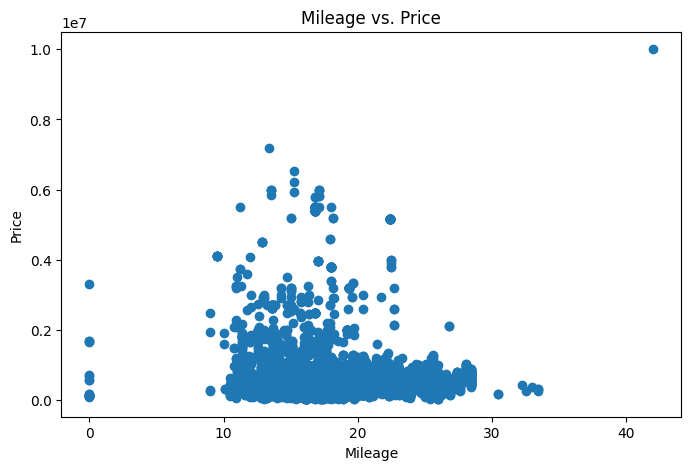

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(df['mileage(km/ltr/kg)'], df['selling_price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')

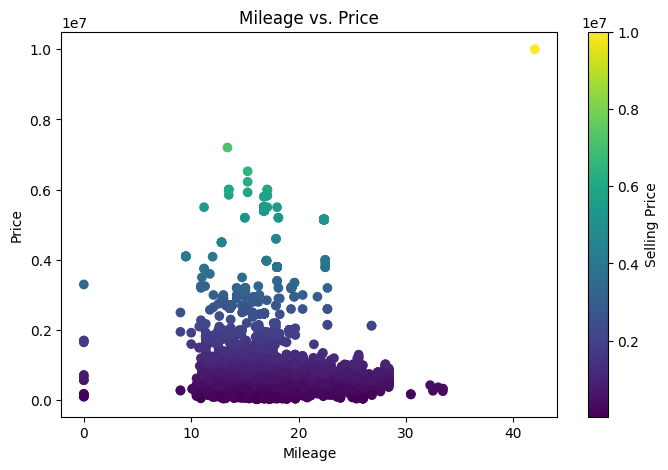

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(df['mileage(km/ltr/kg)'], df['selling_price'], c = df["selling_price"], cmap='viridis')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price')
_ = plt.colorbar(label='Selling Price')

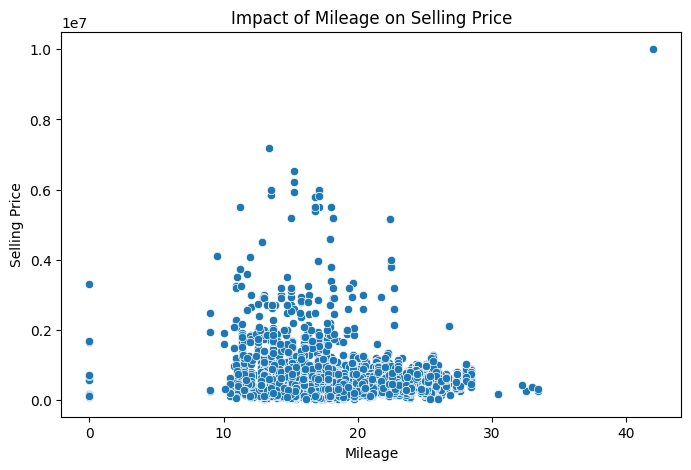

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["mileage(km/ltr/kg)"], y=df["selling_price"])
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.title("Impact of Mileage on Selling Price")
plt.show()

In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
len(df['fuel'].unique())

4

In [29]:
df['fuel'] = df['fuel'].map({'Diesel': 0, 'Petrol': 1, 'LPG': 2, 'CNG': 3})

In [ ]:
df['fuel'].unique()

array([0, 1, 2, 3])

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
df['seller_type'] = le.fit_transform(df['seller_type'])

In [33]:
df['seller_type']

,seller_type
0,1
1,1
2,1
3,1
4,1
...,...
8123,1
8124,1
8125,1
8126,1


In [34]:
df['seller_type'].unique()

array([1, 0, 2])

In [ ]:
len(df['name'].unique())

2058

In [35]:
columns = ['transmission', 'owner', 'name']

In [36]:
for column in columns:
    df[column] = le.fit_transform(df[column])

In [37]:
for column in columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

Unique values in transmission:
[1 0]
Unique values in owner:
[0 2 4 1 3]
Unique values in name:
[1307 1607  385 ... 1787  303 1944]


In [38]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,145500,0,1,1,0,23.40,1248.0,74,5.0
1,1607,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,385,2006,158000,140000,1,1,1,4,17.70,1497.0,78,5.0
3,781,2010,225000,127000,0,1,1,0,23.00,1396.0,90,5.0
4,1349,2007,130000,120000,1,1,1,0,16.10,1298.0,88.2,5.0


In [39]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [40]:
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-40-11608b26104f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
# df["engine"]= df["engine"].fillna(df["engine"].mean())
# df["seats"]= df["seats"].fillna(df["seats"].mean())

In [41]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [42]:
df["max_power"] = pd.to_numeric(df["max_power"], errors='coerce')
df["max_power"] = df["max_power"].fillna(0).astype(int)

In [43]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [46]:
df = df.drop(columns=['name'])

In [47]:
correlation_matrix = df.corr()

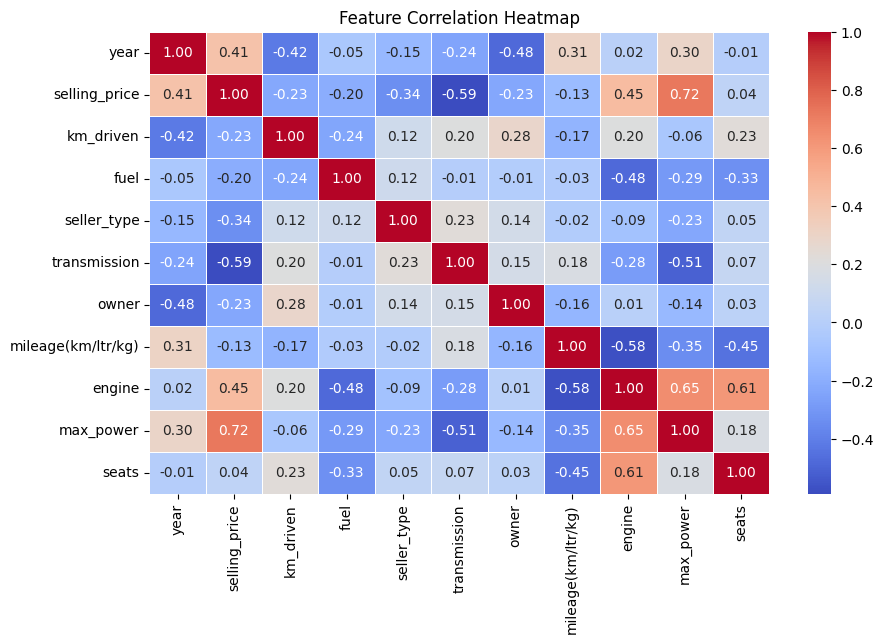

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
X = df

y = df['selling_price']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6502, 11), (6502,), (1626, 11), (1626,))

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [61]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [69]:
y_predict = pipeline.predict(X_test)

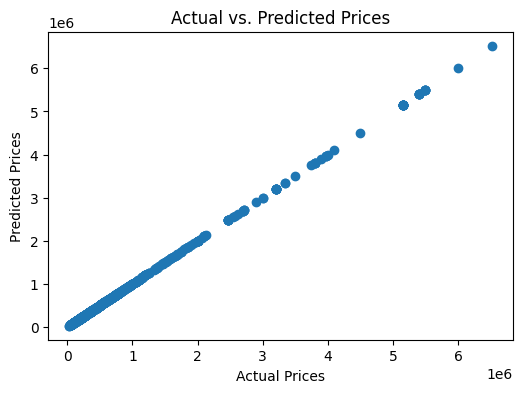

In [79]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [71]:
y_test[:5]

,selling_price
1971,198000
4664,500000
5448,425000
3333,150000
2316,525000


In [72]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 8.74761624896365e-10
Mean Squared Error: 1.3801531921620807e-18
R2 Score: 1.0


In [89]:
num_features = X_train.shape[1]

In [90]:
Xfit = np.zeros((50, num_features))

In [91]:
for i in range(num_features):
    Xfit[:, i] = np.linspace(-1, 11, 50)

In [92]:
yfit = pipeline.predict(Xfit)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
y_test[:5]

,selling_price
1971,198000
4664,500000
5448,425000
3333,150000
2316,525000


In [95]:
x = df['mileage(km/ltr/kg)']

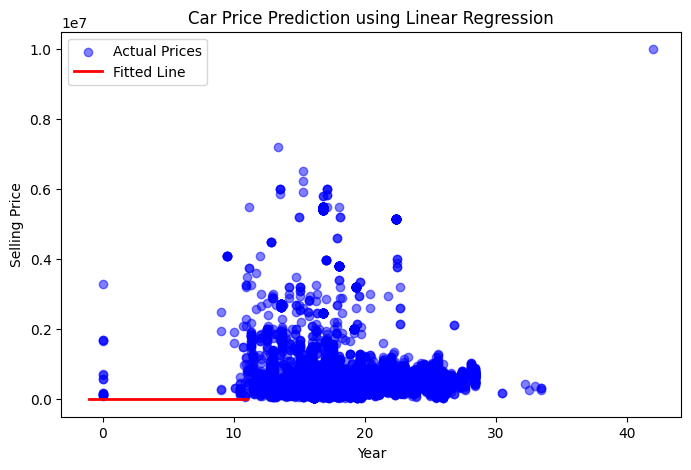

In [107]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.5, label="Actual Prices")
plt.plot(xfit, yfit, color='red', linewidth=2, label="Fitted Line")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Car Price Prediction using Linear Regression")
plt.legend()
plt.show()